# **The beat of the music**.
This *dataset* is composed of songs from 2017 with Spotify API attributes. Each song has been tagged by someone who used "1", when they like the song or "0" if they don't like it. 

Your task is to build a classifier that can predict the preferences of the song attributes.

Each row of the *dataframe* represents a song. There are 16 columns, 13 of which are song attributes, one column for the song name, one for the artist, and one column called "destination", which is the aforementioned label for the song. The track attributes are: acoustics, danceability, duration, energy, instrumentality, key, liveliness, volume, mode, speech, tempo, time signature, valence (more information [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)).

### Loading the DataFrame

In this section we load the data from the DataFrame and perform a visualization of the data distributions in order to familiarize ourselves with the information and draw some early conclusions.

In [ ]:
import pandas as pd
#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [ ]:
attributes_spotify

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


#### Histograms

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


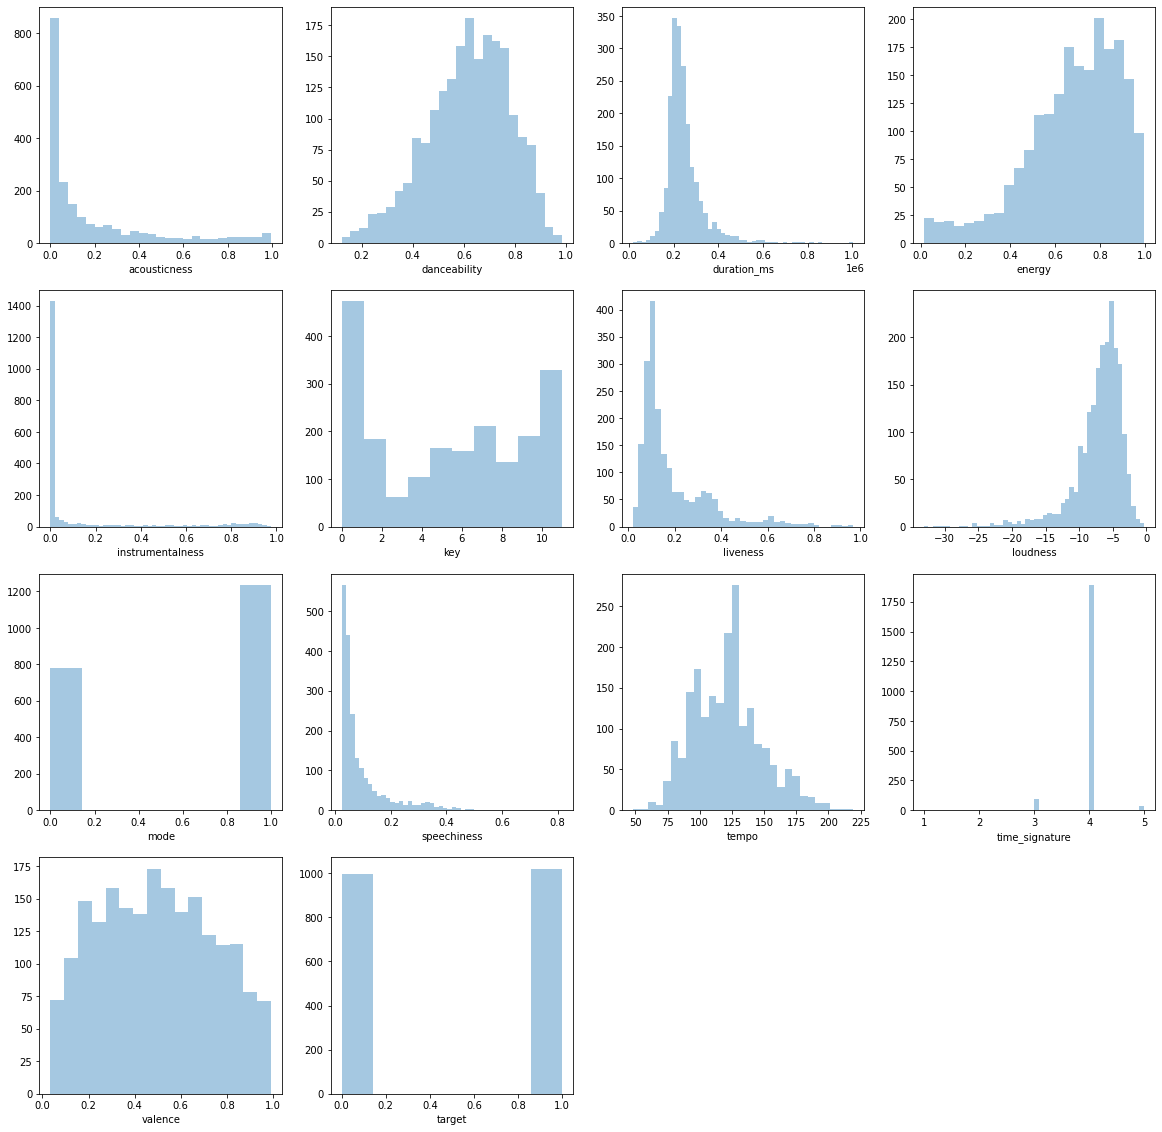

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



df = attributes_spotify.drop(columns= ['Unnamed: 0','song_title','artist'])
plt.figure(figsize=(20,20))
for i in range(len(df.columns)):
  ax=plt.subplot(4, 4, i+1)
  feature = df.columns[i]
  sns.distplot(df[feature], kde=False, ax=ax);

We identified that there are certain parameters that have a tendency to normal distribution. Among them:
* energy
* danceability
* loadness
* duration_ms

The first two correspond to normalized values between 0 and 1, so this process would not be necessary.

The first proposal is to determine a set of parameters that are most influential at the time of classification.

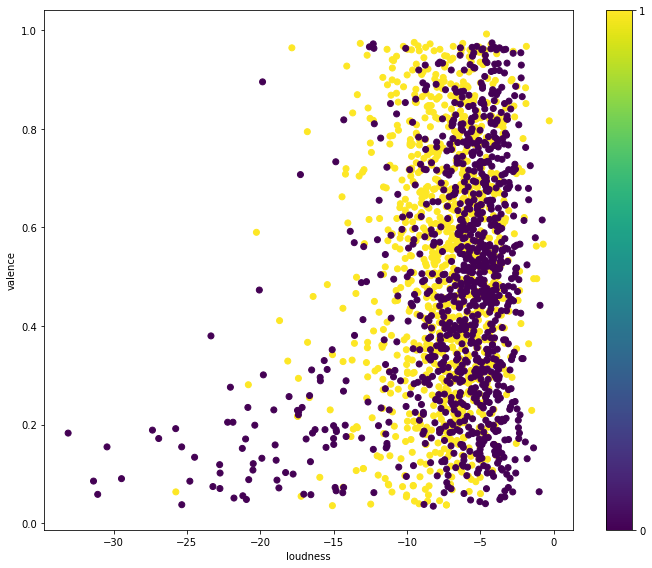

In [ ]:
# Combinamos distintos atributos a graficar en formato x vs y.

labels = [0,1]
feature = 'loudness'
feature1 = 'valence'

# Definimos el  formatter
formatter = plt.FuncFormatter(lambda i, *args: '{}'.format(labels[i]))
# Definimos el grafico
plt.figure(figsize=(10,8))
plt.scatter(df[feature],df[feature1], c=df['target'])
plt.colorbar(ticks=[0,1], format=formatter)
plt.xlabel(feature)
plt.ylabel(feature1)

plt.tight_layout()
plt.show()

##### Conclusions from the visualizations
* Danceability and energy: From the data visualization, it was deduced that energy and danceability did not generate a simple correlation between the input value and the target.

* Loudness : for very low values, in general, there is a tendency to dislike. But above -15dB it becomes unclear.

* Acousticness : in general, for acousticness =1, the target is 0.

Proposal to continue : separate the dataframe into target 0 and target 1 generate histograms of both and look at attributes that generate little overlapping

In [ ]:
#Particion con target 0
df_target0 = df[df['target'] == 0]
df_target0.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,997.000000,997.000000,9.970000e+02,997.000000,997.000000,997.000000,997.00000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.0
mean,0.221670,0.589648,2.341405e+05,0.673138,0.091135,5.218656,0.18670,-6.811743,0.647944,0.078659,120.666027,3.957874,0.469836,0.0
std,0.292590,0.153714,6.896629e+04,0.240815,0.238319,3.624760,0.14776,4.462326,0.477851,0.074261,27.943550,0.287334,0.244311,0.0
min,0.000005,0.152000,1.604200e+04,0.014800,0.000000,0.000000,0.02190,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.0
25%,0.010900,0.487000,1.991110e+05,0.549000,0.000000,2.000000,0.09290,-7.577000,0.000000,0.035300,98.972000,4.000000,0.262000,0.0
50%,0.079300,0.598000,2.227330e+05,0.723000,0.000003,5.000000,0.12300,-5.535000,1.000000,0.049100,120.013000,4.000000,0.466000,0.0
75%,0.302000,0.697000,2.523600e+05,0.861000,0.002090,8.000000,0.23600,-4.251000,1.000000,0.091100,138.858000,4.000000,0.655000,0.0
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.92400,-0.787000,1.000000,0.622000,203.822000,5.000000,0.974000,0.0


In [ ]:
# Partición con target 1
df_target1 = df[df['target'] == 1]
df_target1.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.0
mean,0.154279,0.646547,258197.574510,0.689826,0.174486,5.463725,0.194895,-7.353329,0.577451,0.106354,122.519382,3.978431,0.523186,1.0
std,0.218645,0.163108,91441.699498,0.175084,0.297779,3.668776,0.162592,2.896032,0.494207,0.101148,25.376196,0.220459,0.247271,0.0
min,0.000003,0.122000,52006.000000,0.031000,0.000000,0.000000,0.018800,-25.756000,0.000000,0.023100,64.992000,3.000000,0.035900,1.0
25%,0.008558,0.553500,202116.750000,0.572000,0.000001,2.000000,0.092075,-8.828500,0.000000,0.040275,104.992250,4.000000,0.322000,1.0
50%,0.049050,0.670500,238256.500000,0.708000,0.002380,6.000000,0.129500,-6.948000,1.000000,0.058800,122.030500,4.000000,0.530000,1.0
75%,0.208750,0.767250,289277.000000,0.832250,0.204250,9.000000,0.256000,-5.306500,1.000000,0.131250,136.034250,4.000000,0.717000,1.0
max,0.990000,0.962000,849960.000000,0.989000,0.968000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


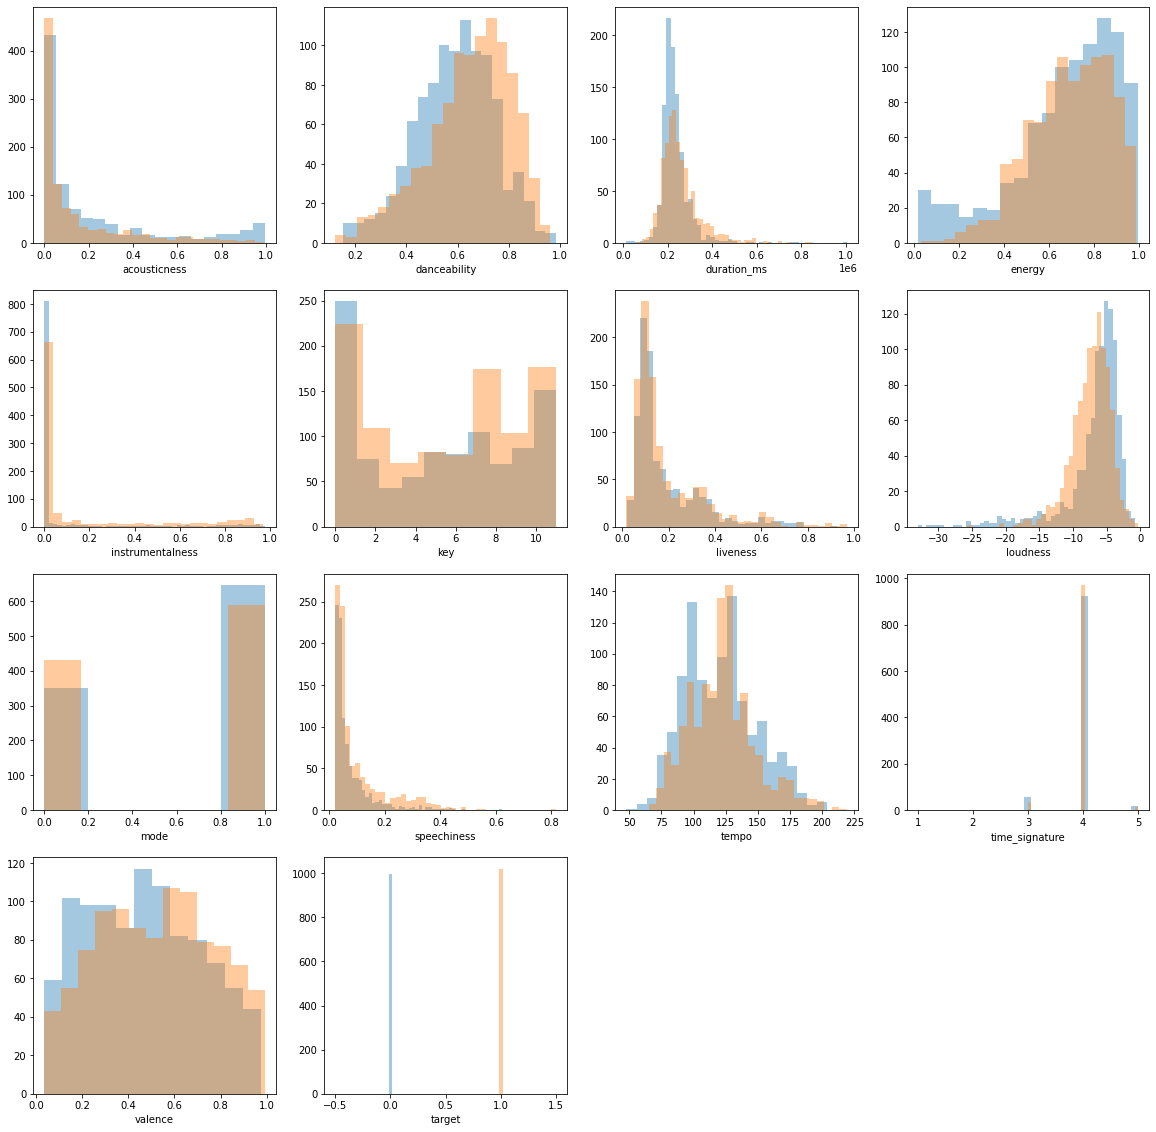

In [ ]:
#Ploteo de las particiones
plt.figure(figsize=(20,20))
for i in range(len(df.columns)):
  ax=plt.subplot(4, 4, i+1)
  feature = df.columns[i]
  sns.distplot(df_target0[feature], kde=False, ax=ax);
  sns.distplot(df_target1[feature], kde=False, ax=ax);

In [ ]:
#Otro procesamiento para mejorar el resultado final es standarizar los atributos a utilizar en el clasificador

from sklearn.preprocessing import scale as skscale

tempo_norm = skscale(df.tempo, axis=0, with_mean=True, with_std=True, copy=True)
df['tempo_norm'] = tempo_norm
duration_ms_norm = skscale(df.duration_ms, axis=0, with_mean=True, with_std=True, copy=True)
df['duration_ms_norm'] = duration_ms_norm
loudness_norm = skscale(df.loudness, axis=0, with_mean=True, with_std=True, copy=True)
df['loudness_norm'] = loudness_norm

df_norm = df.drop(columns= ['tempo','duration_ms','loudness'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


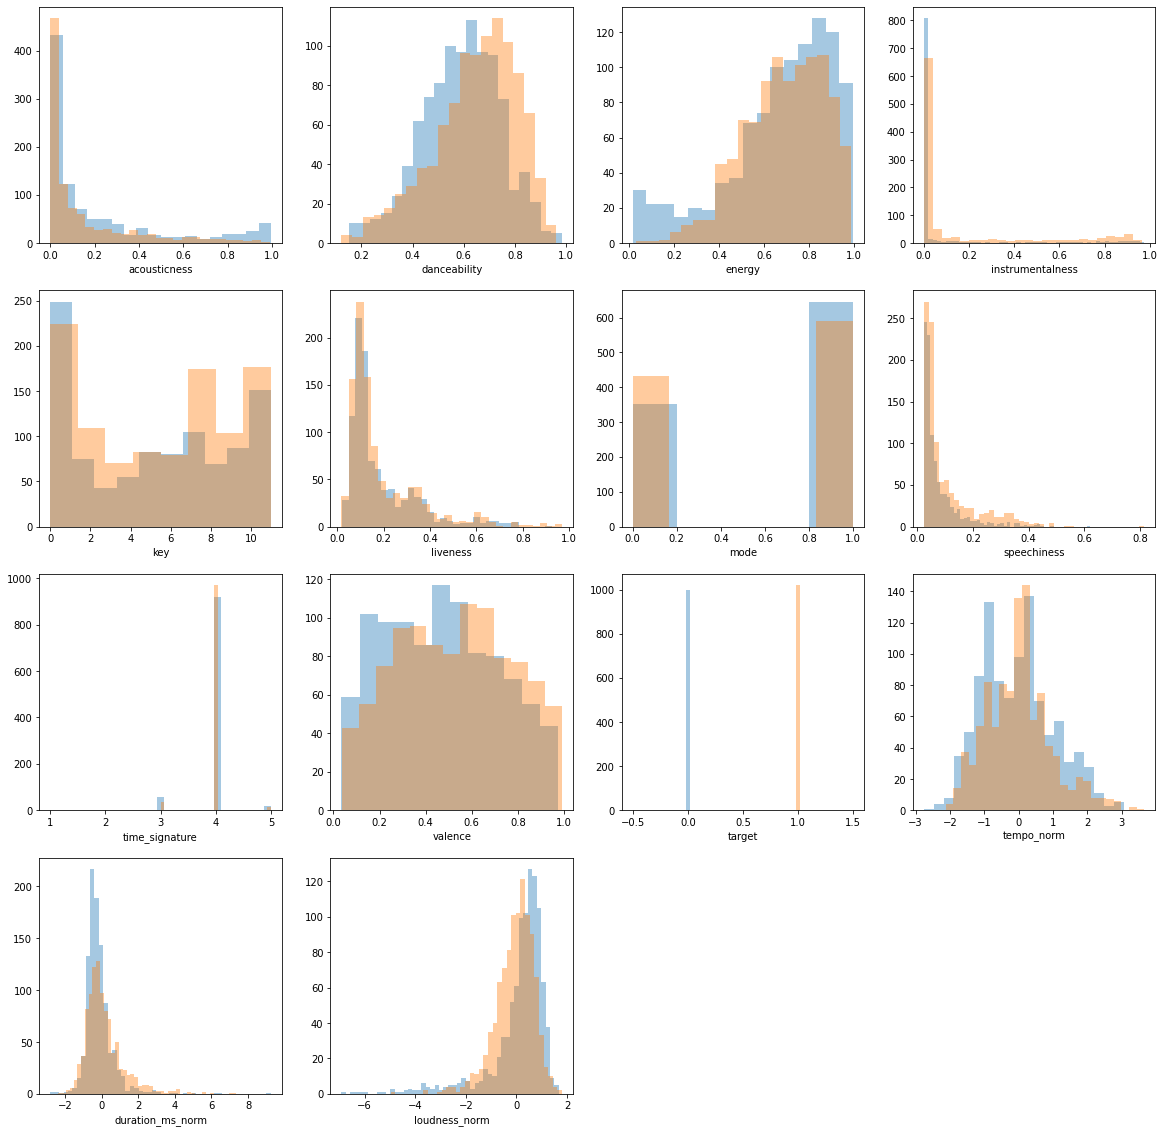

In [ ]:
df_n_target0 = df_norm[df_norm['target'] == 0]
df_n_target1 = df_norm[df_norm['target'] == 1]

plt.figure(figsize=(20,20))
for i in range(len(df_n_target0.columns)):
  ax=plt.subplot(4, 4, i+1)
  feature = df_n_target0.columns[i]
  sns.distplot(df_n_target0[feature], kde=False, ax=ax);
  sns.distplot(df_n_target1[feature], kde=False, ax=ax);

In [ ]:
df_n_target0.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,mode,speechiness,time_signature,valence,target,tempo_norm,duration_ms_norm,loudness_norm
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.00000,997.000000,997.000000,997.000000,997.000000,997.0,997.000000,997.000000,997.000000
mean,0.221670,0.589648,0.673138,0.091135,5.218656,0.18670,0.647944,0.078659,3.957874,0.469836,0.0,-0.035130,-0.148432,0.072826
std,0.292590,0.153714,0.240815,0.238319,3.624760,0.14776,0.477851,0.074261,0.287334,0.244311,0.0,1.047399,0.841448,1.186552
min,0.000005,0.152000,0.014800,0.000000,0.000000,0.02190,0.000000,0.023100,1.000000,0.034800,0.0,-2.764133,-2.809419,-6.916536
25%,0.010900,0.487000,0.549000,0.000000,2.000000,0.09290,0.000000,0.035300,4.000000,0.262000,0.0,-0.848281,-0.575822,-0.130659
50%,0.079300,0.598000,0.723000,0.000003,5.000000,0.12300,1.000000,0.049100,4.000000,0.466000,0.0,-0.059608,-0.287613,0.412318
75%,0.302000,0.697000,0.861000,0.002090,8.000000,0.23600,1.000000,0.091100,4.000000,0.655000,0.0,0.646753,0.073862,0.753739
max,0.995000,0.984000,0.998000,0.976000,11.000000,0.92400,1.000000,0.622000,5.000000,0.974000,0.0,3.081778,9.252160,1.674831


In [ ]:
df_n_target1.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,mode,speechiness,time_signature,valence,target,tempo_norm,duration_ms_norm,loudness_norm
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.0,1020.000000,1020.000000,1020.000000
mean,0.154279,0.646547,0.689826,0.174486,5.463725,0.194895,0.577451,0.106354,3.978431,0.523186,1.0,0.034338,0.145085,-0.071184
std,0.218645,0.163108,0.175084,0.297779,3.668776,0.162592,0.494207,0.101148,0.220459,0.247271,0.0,0.951168,1.115667,0.770067
min,0.000003,0.122000,0.031000,0.000000,0.000000,0.018800,0.000000,0.023100,3.000000,0.035900,1.0,-2.121942,-2.370628,-4.964533
25%,0.008558,0.553500,0.572000,0.000001,2.000000,0.092075,0.000000,0.040275,4.000000,0.322000,1.0,-0.622626,-0.539149,-0.463438
50%,0.049050,0.670500,0.708000,0.002380,6.000000,0.129500,1.000000,0.058800,4.000000,0.530000,1.0,0.016014,-0.098213,0.036595
75%,0.208750,0.767250,0.832250,0.204250,9.000000,0.256000,1.000000,0.131250,4.000000,0.717000,1.0,0.540912,0.524280,0.473077
max,0.990000,0.962000,0.989000,0.968000,11.000000,0.969000,1.000000,0.816000,5.000000,0.992000,1.0,3.663097,7.365091,1.802465


In principle, I will work with:

* danceability
* tempo_norm
* loudness_norm
* duration_ms_norm

which I see less overlap in the distributions between those belonging to target0 and target1. And thus, they should make a better decision between belonging to one class and the other.

Let's do a test without CrossValidation to analyze the performance obtained.

In [ ]:
# Dataset Split
from sklearn.model_selection import train_test_split

X = df_norm[['danceability','tempo_norm','loudness_norm','duration_ms_norm']]
y = df_norm.target
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [ ]:
#Train the model
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
#Performance evaluation methods
import numpy as np

def accuracy (test_data, test_target, model, positive_class):
  total_population = len(test_target)
  TP = 0
  TN = 0
  prediction = model.predict(test_data)
  test_targets = test_target.to_numpy().tolist()
  for i in range(total_population-1):
    aux1 = prediction[i].astype(int)
    aux2 = test_targets[i]
    if (aux1 == aux2):
      if (aux2 == positive_class):
        TP = TP+1
      else :
        TN = TN+1


  return (TP+TN)/total_population




def precision_mes (test_data, test_target, model, positive_class):
  total_population = len(test_target)
  TP = 0
  FP = 0
  
  prediction = model.predict(test_data)
  test_targets = test_target.to_numpy().tolist()
  for i in range(total_population-1):
    aux1 = prediction[i].astype(int)
    aux2 = test_targets[i]
    if (aux1 == aux2) and (aux2== positive_class):
      TP = TP+1
    elif (aux1 == positive_class):
      FP = FP+1


  return (TP)/(FP+TP)

def recall (test_data, test_target, model, positive_class):
  total_population = len(test_target)
  TP = 0
  FN = 0
  
  prediction = model.predict(test_data)
  test_targets = test_target.to_numpy().tolist()
  for i in range(total_population-1):
    aux1 = prediction[i].astype(int)
    aux2 = test_targets[i]
    if (aux1 == aux2) and (aux2 == positive_class):
      TP = TP+1
    elif (aux2 == positive_class):
      FN = FN+1


  return (TP)/(FN+TP)


def f_measure (test_data, test_target, model, positive_class):
  recall_measure = recall (test_data,test_target, model, positive_class)
  precision_measure = precision_mes(test_data,test_target, model, positive_class)
  return (2*precision_measure*recall_measure)/(precision_measure+recall_measure)


def evaluation (test_data, test_target,model, positive_class) :
  acc = accuracy(test_data, test_target,model, positive_class)
  prec = precision_mes(test_data,test_target, model, positive_class)
  fmes = f_measure (test_data, test_target,model, positive_class)

  return acc, prec, fmes

In [ ]:
#Model evaluation
acc, precition, fmes = evaluation(X_test,y_test, knn, 1)
print('Accuracy:{}'.format(acc))
print('Precision:{}'.format(precition))
print('F-Measure:{}'.format(fmes))

Accuracy:0.6521308225966304
Precision:0.6760259179265659
F-Measure:0.6413934426229507


Modifiquemos el nro de vecinos para determinar su influencia. Un criterio común es utilizar sqrt(nro de puntos/muestras)

In [ ]:
from sklearn.model_selection import train_test_split

#X = df_norm.drop(columns = ['target'])
X = df_norm[['danceability','tempo_norm','loudness_norm','duration_ms_norm']]
y = df_norm.target
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
#Train the model
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train, y_train)

acc, precition, fmes = evaluation(X_test,y_test, knn, 1)
print('Accuracy:{}'.format(acc))
print('Precision:{}'.format(precition))
print('F-Measure:{}'.format(fmes))

Accuracy:0.6570862239841427
Precision:0.6891891891891891
F-Measure:0.6394984326018808


The performance improves slightly.

I propose to perform a GridSearch on the number of neighbors to determine the best tuning of this hyperparameter. In addition, consider different sets of attributes considered.

* ['danceability','tempo_norm','loudness_norm','duration_ms_norm']
* ['danceability', 'tempo_norm', 'loudness_norm', 'duration_ms_norm', 'instrumentalness', 'acousticness']
* all


In [ ]:
#GridSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#X = df_norm[['danceability','tempo_norm','loudness_norm','duration_ms_norm']] #
X = df_norm[['danceability','tempo_norm','loudness_norm','duration_ms_norm','instrumentalness', 'acousticness']] #Better performance achieved
#X = df_norm.drop(columns=['target']) #all feature leads to worst performance
y = df_norm.target
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#Parameter grid
k = [1,3,10,20,30,50,100,300]
param_grid = {'n_neighbors': k}
#Model definition
prediction_model = neighbors.KNeighborsClassifier()
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    gs = GridSearchCV(estimator=prediction_model, param_grid=param_grid, cv=None, scoring='%s_macro' % score)
    gs.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_neighbors': 3}

Grid scores on development set:

0.641 (+/-0.040) for {'n_neighbors': 1}
0.675 (+/-0.045) for {'n_neighbors': 3}
0.666 (+/-0.058) for {'n_neighbors': 10}
0.666 (+/-0.068) for {'n_neighbors': 20}
0.656 (+/-0.097) for {'n_neighbors': 30}
0.658 (+/-0.091) for {'n_neighbors': 50}
0.640 (+/-0.091) for {'n_neighbors': 100}
0.640 (+/-0.082) for {'n_neighbors': 300}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       496
           1       0.67      0.60      0.63       513

    accuracy                           0.65      1009
   macro avg       0.65      0.65      0.64      1009
weighted avg       0.65      0.65      0.64      1009


# Tuning hyper-parameters for recall

Best parameters set found on

### Analysis with PCA 

An alternative to look for a better performance is to project the attributes on their principal components and reduce the order of the input data to the model. This, in turn, allows a better visualization of the data belonging to both sets.

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [ ]:
df.keys()

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'tempo_norm', 'duration_ms_norm', 'loudness_norm'],
      dtype='object')

In [ ]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,tempo_norm,duration_ms_norm,loudness_norm
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,1.066709,-0.508851,-0.454530
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,1.442323,0.983716,-0.881573
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,-1.745166,-0.739362,-0.016586
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,-1.316964,-0.572137,-2.167220
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,1.964120,1.788484,-1.213155


In [ ]:
#First, the data needs to be scaled
from sklearn.preprocessing import StandardScaler

X = df.drop(columns= ['target']) #We first consider the entired list of features
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

scaler=StandardScaler()
scaler.fit(X_train)
scaled_x_train=scaler.transform(X_train)
scaled_x_train

array([[-0.70381545,  0.88896364,  0.78495657, ...,  0.14245949,
         0.78495657, -0.07064783],
       [-0.70380789, -0.09661453, -0.43138957, ..., -0.81821624,
        -0.43138957,  0.82153503],
       [ 0.21058151,  0.18057933,  0.52554719, ...,  0.07261244,
         0.52554719, -0.26332195],
       ...,
       [-0.70148447, -0.1520533 ,  1.54950545, ..., -0.24271801,
         1.54950545,  0.3729699 ],
       [-0.70741887, -1.83369605, -1.61569801, ..., -0.99108483,
        -1.61569801,  0.60467358],
       [-0.60129397,  0.10666097, -0.60376689, ..., -1.28350451,
        -0.60376689,  0.48703517]])

In [ ]:
#PCA Fitting.
from sklearn.decomposition import PCA
# This means to train the coefficients to find the best proyection axis. Check the following link for further information
# https://www.youtube.com/watch?v=FgakZw6K1QQ
pca=PCA(n_components=2)    ####
pca.fit(scaled_x_train)
x_train_pca=pca.transform(scaled_x_train)

In [ ]:
#Dimension check
print('Dimensiones iniciales:',scaled_x_train.shape)
print('Dimensiones luego de PCA:',x_train_pca.shape)


Dimensiones iniciales: (1008, 16)
Dimensiones luego de PCA: (1008, 3)


Text(0, 0.5, 'Second principle component')

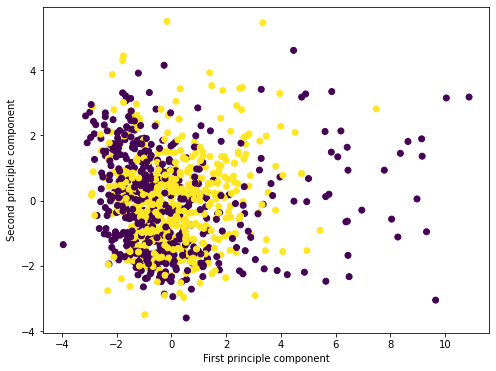

In [ ]:
#Plotting
plt.figure(figsize=(8,6))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

This graph already indicates that there is a strong overlap of classes. This indicates that the performance is potentially going to be poor using this method.

In [ ]:
#Train
knn_pca = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(x_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Evaluation
scaled_x_test=scaler.transform(X_test)
x_test_pca=pca.transform(scaled_x_train)
print('Dimensiones luego de PCA:',x_test_pca.shape)
acc, precition, fmes = evaluation(x_test_pca,y_test, knn_pca, 1)
print('Accuracy:{}'.format(acc))
print('Precision:{}'.format(precition))
print('F-Measure:{}'.format(fmes))

Dimensiones luego de PCA: (1008, 3)
Accuracy:0.4707631318136769
Precision:0.48
F-Measure:0.47384007897334646


This result indicates that the strong overlapping of classes leads to poor classifier performance. This could be due to the presence of attributes that impair the performance of the model, even when using PCA. 

Let us see if we can improve the performance of 0.67 achieved by generating more selective attributes. 

I propose to use the data set having applied PCA to the search using GridSearch.

In [ ]:

X = df[['danceability','tempo_norm','loudness_norm','duration_ms_norm','instrumentalness', 'acousticness']] 
y = df.target
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#Escalado del DataFrame
scaler=StandardScaler()
scaler.fit(X_train)
scaled_x_train  = scaler.transform(X_train)
scaled_x_test   = scaler.transform(X_test)

pca=PCA(n_components=4)
pca.fit(scaled_x_train)
X_train_pca=pca.transform(scaled_x_train)
X_test_pca=pca.transform(scaled_x_test)


k = [1,3,10,20,30,50,100,300]
param_grid = {'n_neighbors': k}

prediction_model = neighbors.KNeighborsClassifier()

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    gs = GridSearchCV(estimator=prediction_model, param_grid=param_grid, cv=None, scoring='%s_macro' % score)
    gs.fit(X_train_pca, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(X_test_pca)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_neighbors': 20}

Grid scores on development set:

0.657 (+/-0.055) for {'n_neighbors': 1}
0.683 (+/-0.069) for {'n_neighbors': 3}
0.704 (+/-0.058) for {'n_neighbors': 10}
0.706 (+/-0.091) for {'n_neighbors': 20}
0.699 (+/-0.071) for {'n_neighbors': 30}
0.692 (+/-0.081) for {'n_neighbors': 50}
0.685 (+/-0.074) for {'n_neighbors': 100}
0.645 (+/-0.077) for {'n_neighbors': 300}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       496
           1       0.73      0.56      0.63       513

    accuracy                           0.67      1009
   macro avg       0.68      0.67      0.67      1009
weighted avg       0.68      0.67      0.67      1009


# Tuning hyper-parameters for recall

Best parameters set found o

We see that the performance is still below that achieved without PCA. Again, the answer is evident when plotting the classes after the projection. Therefore, in this case it is not convenient to perform PCA since the reduction of order deteriorates the distinction between the classes. At least, using only 2 axes in order to visualize the results.

Varying the number of principal components improved the performance. In this case, by taking the 6 most selective attributes to 4 components, the performance of the method was improved to about 70%.